In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split


In [2]:
df=pd.read_csv('avocado.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [4]:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [5]:
df.shape

(18249, 14)

In [6]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [7]:
#let's check in how many regions avocado is in demand
df.region.unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [8]:
#now let's check in which region the Avocado is in high demand
df.region.max()

'WestTexNewMexico'

In [9]:
#Now let's check in which region the demand is less
df.region.min()

'Albany'

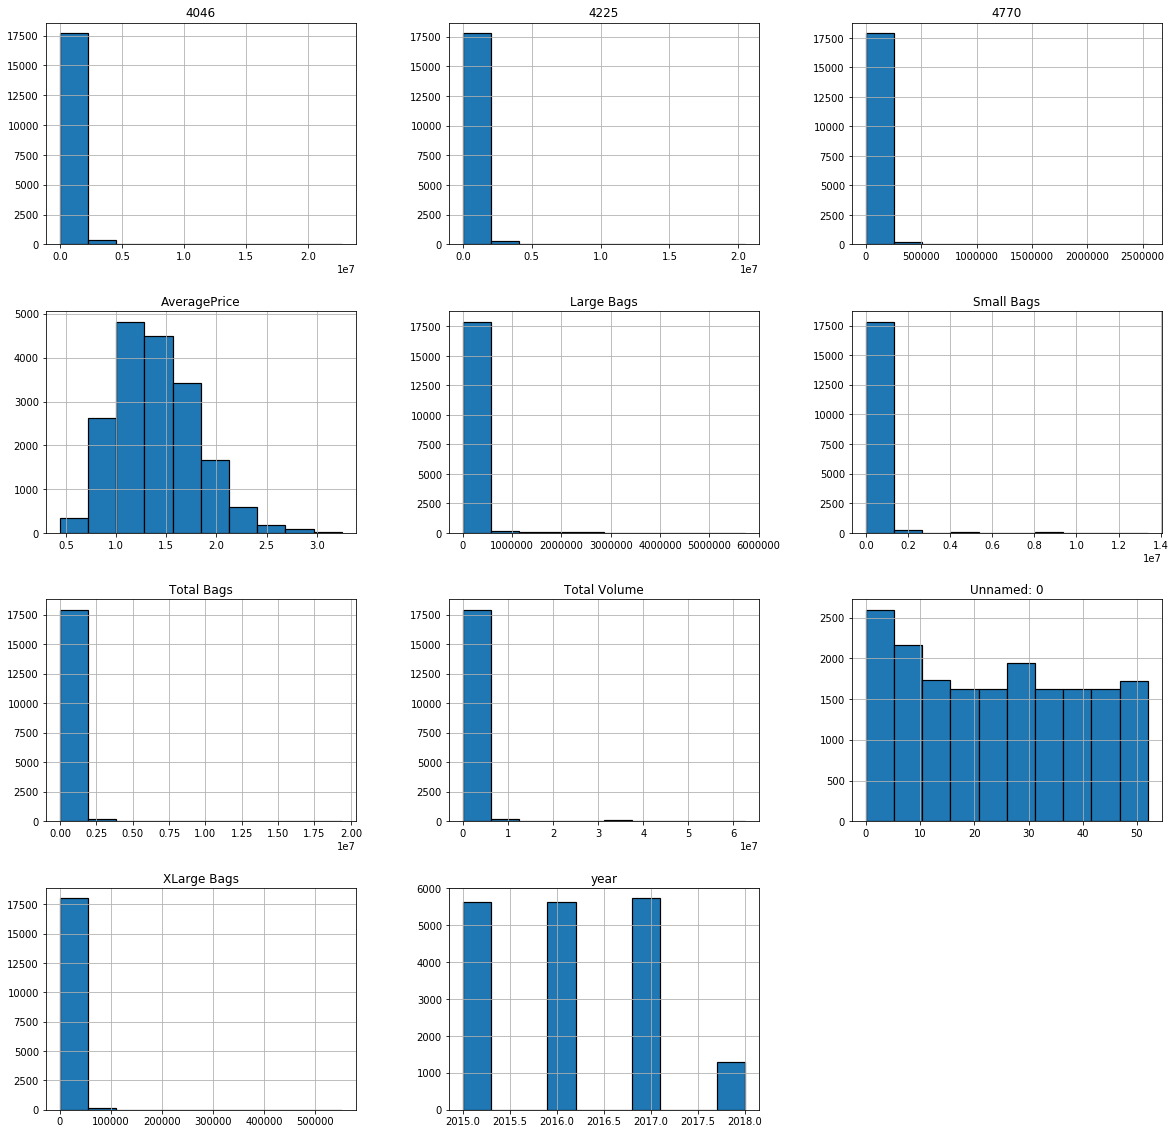

In [10]:
df.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20));

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [12]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [13]:
df.type.unique()

array(['conventional', 'organic'], dtype=object)

In [14]:
df.year.unique()

array([2015, 2016, 2017, 2018], dtype=int64)

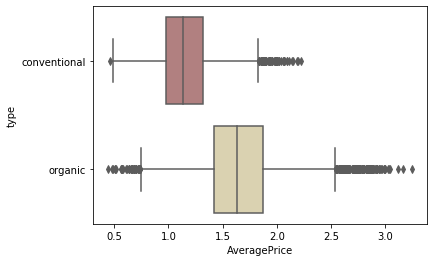

In [15]:
sns.boxplot(y="type", x="AveragePrice", data=df, palette = 'pink')

From the above boxplot we can say that Organic avocado price is higher as compared to conventional avocado.

In [16]:

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [17]:
label = LabelEncoder()
dicts = {}

label.fit(df.type.drop_duplicates()) 
dicts['type'] = list(label.classes_)
df.type = label.transform(df.type)

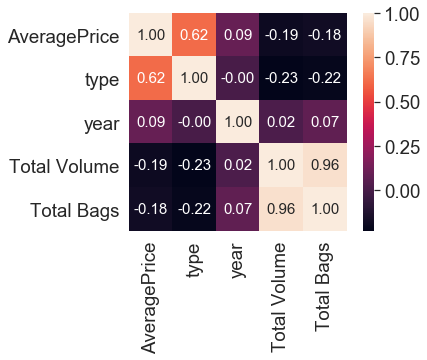

In [18]:
cols = ['AveragePrice','type','year','Total Volume','Total Bags']
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale = 1.7)
hm = sns.heatmap(cm,cbar = True, annot = True,square = True, fmt = '.2f', annot_kws = {'size':15}, yticklabels = cols, xticklabels = cols)

 this shows that there is a strong relation between Total Bags and TotalVolume , 0.96 and also type and AveragePrice ie, 0.62.
Other than that there is weak realation.

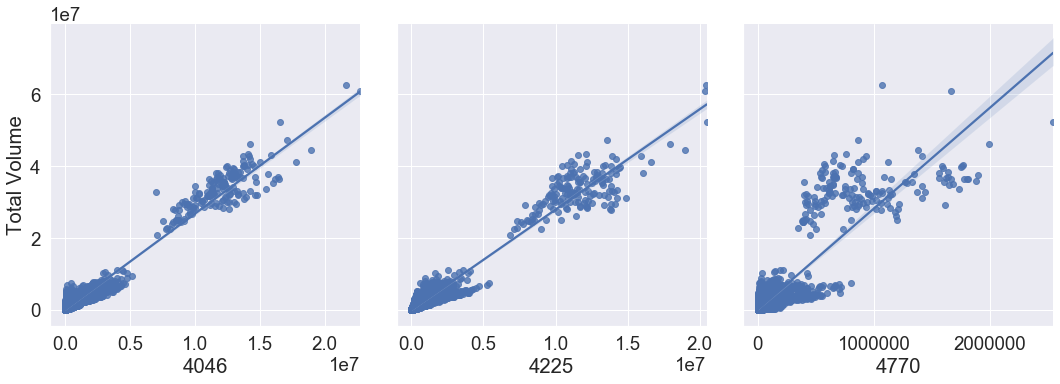

In [19]:
sns.pairplot(df, x_vars=['4046', '4225', '4770'], y_vars='Total Volume', size=5, aspect=1, kind='reg')

There is a strong co-relation between TotalVolume Vs Small and TotalBags Vs SmallBags. weak co-relation between TotalVolume Vs XLarge and TotalBags Vs XLargeBags.
Large and LargeBags comes in the middle.

Text(0.5, 1.0, 'Yearly Average Price in Each Region')

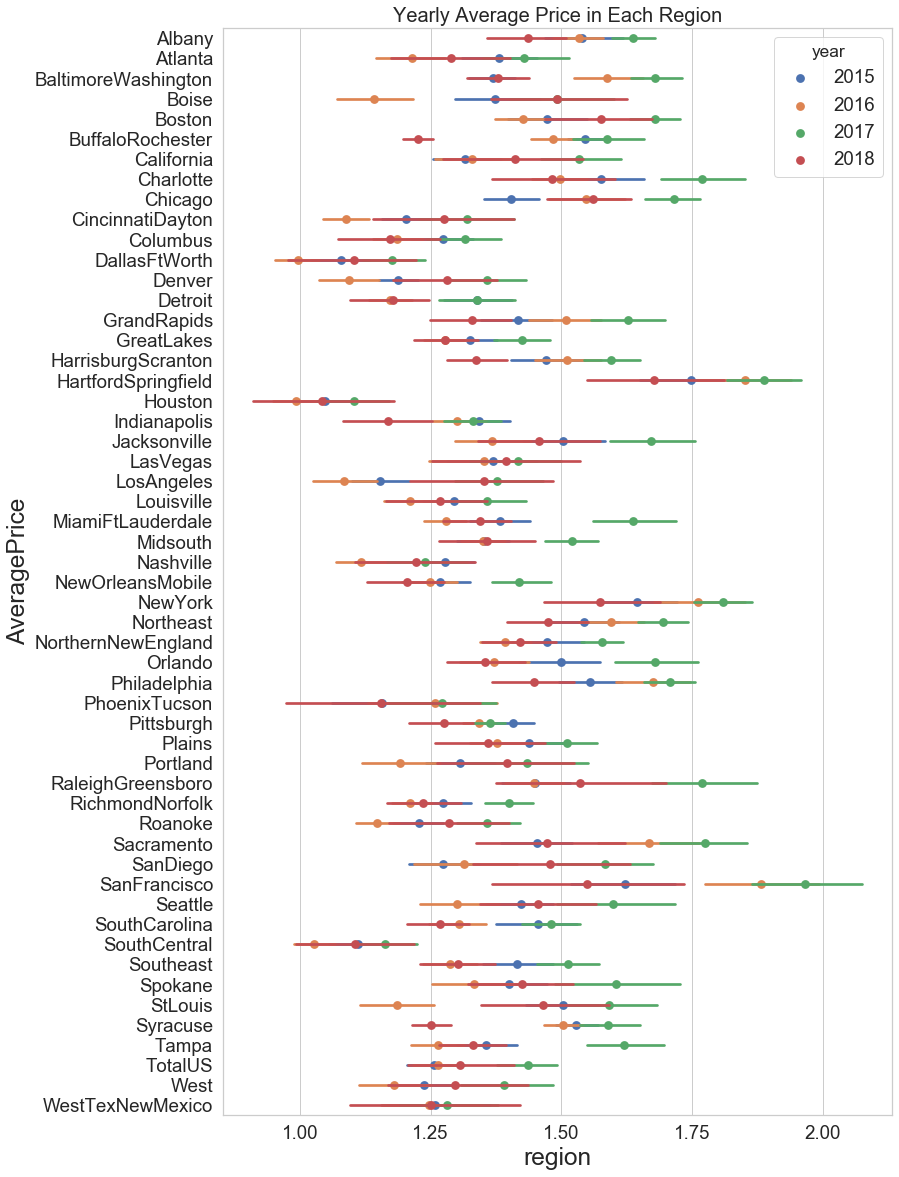

In [20]:
plt.figure(figsize=(12,20))
sns.set_style('whitegrid')
sns.pointplot(x='AveragePrice',y='region',data=df, hue='year',join=False)
plt.xticks(np.linspace(1,2,5))
plt.xlabel('region',{'fontsize' : 'large'})
plt.ylabel('AveragePrice',{'fontsize':'large'})
plt.title("Yearly Average Price in Each Region",{'fontsize':20})

Text(0.5, 1.0, 'Type Average Price in Each Region')

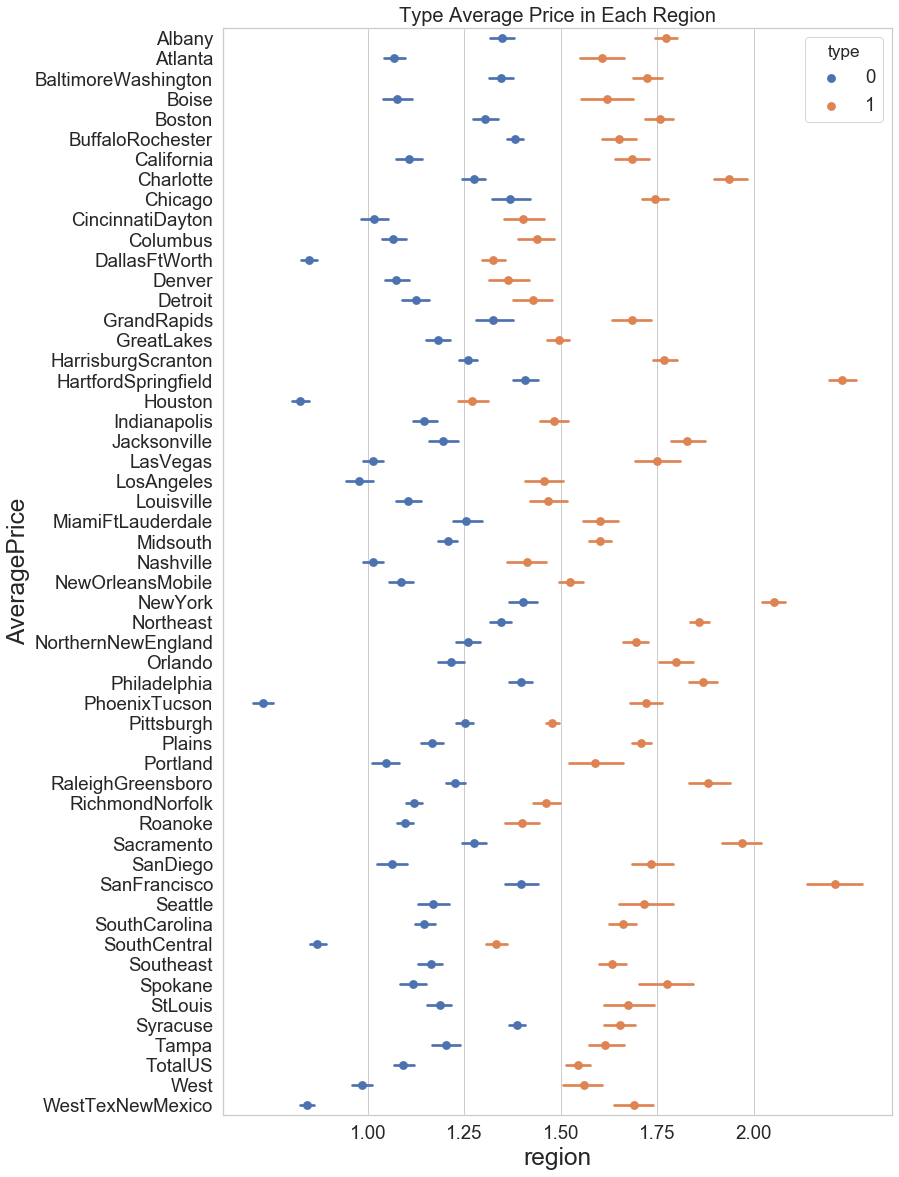

In [21]:
plt.figure(figsize=(12,20))
sns.set_style('whitegrid')
sns.pointplot(x='AveragePrice', y='region', data=df, hue='type',join=False)
plt.xticks(np.linspace(1,2,5))
plt.xlabel('region',{'fontsize' : 'large'})
plt.ylabel('AveragePrice',{'fontsize':'large'})
plt.title("Type Average Price in Each Region",{'fontsize':20})

In [22]:
x=df[['AveragePrice', '4046', '4225', '4770', 'Small Bags', 'Large Bags', 'XLarge Bags']] #feature columns
y=df.type #predictor variable

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)




In [23]:

x_train.shape


(14599, 7)

In [24]:
y_train.shape

(14599,)

In [25]:
x_test.shape


(3650, 7)

In [26]:
y_test.shape

(3650,)

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from subprocess import check_output
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


In [28]:
#Logistic Regression model
logreg = LogisticRegression()
logreg.fit(x_train,y_train)

y_pred_train = logreg.predict(x_train)  
y_pred_test = logreg.predict(x_test)  

#Acuuracy score
print('Accuracy score for Logistic Regression test data is:', accuracy_score(y_test,y_pred_test))


Accuracy score for Logistic Regression test data is: 0.9402739726027397


In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))
confusion_matrix.index = ['organic','Conventional']
confusion_matrix.columns = ['Predicted organic','Predicted Conventional']
print("Confusion matrix for logistic regression model")
print(confusion_matrix)


Confusion matrix for logistic regression model
              Predicted organic  Predicted Conventional
organic                    1664                     184
Conventional                 34                    1768


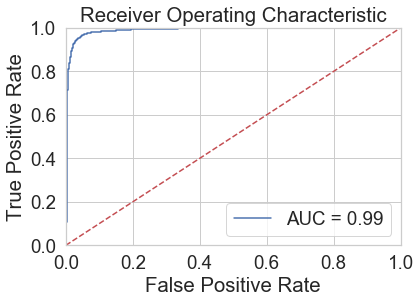

In [30]:
probs = logreg.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [31]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [32]:
rf = RandomForestClassifier(random_state = 0)
rf.fit(x_train, y_train)

y_pred_train = rf.predict(x_train)
y_pred_test = rf.predict(x_test)


In [33]:
print('Accuracy score for test data using Random Forest :', accuracy_score(y_test,y_pred_test))


Accuracy score for test data using Random Forest : 0.996986301369863


In [34]:
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))
confusion_matrix.index = ['organic','Conventional']
confusion_matrix.columns = ['Predicted organic','Predicted Conventional']
print("Confusion matrix for Random forest model")
print(confusion_matrix)


Confusion matrix for Random forest model
              Predicted organic  Predicted Conventional
organic                    1841                       7
Conventional                  4                    1798


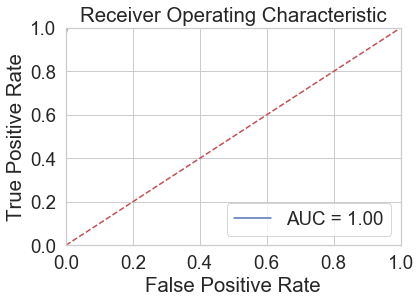

In [35]:
probs = rf.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [36]:
df.drop(['Date', 'Total Volume', 'Total Bags', 'region', 'year'], axis = 1,inplace = True)

In [37]:
df.columns

Index(['Unnamed: 0', 'AveragePrice', '4046', '4225', '4770', 'Small Bags',
       'Large Bags', 'XLarge Bags', 'type'],
      dtype='object')

In [38]:
scaler = StandardScaler().fit(df)
data_avocado_scaler = scaler.transform(df)
data_avocado = pd.DataFrame(data_avocado_scaler)
data_avocado.columns = ['0','AveragePrice', 'Small', 'Large', 'XLarge', 'SmallBags', 'LargeBags', 'XLargeBags', 'Type']
data_avocado.head()

,0,AveragePrice,Small,Large,XLarge,SmallBags,LargeBags,XLargeBags,Type
0,-1.565327,-0.188689,-0.230816,-0.199902,-0.212091,-0.232647,-0.222352,-0.17558,-0.999836
1,-1.500730,-0.139020,-0.231103,-0.208054,-0.211997,-0.231568,-0.222335,-0.17558,-0.999836
2,-1.436133,-1.182069,-0.231007,-0.154478,-0.211325,-0.233399,-0.222311,-0.17558,-0.999836
3,-1.371536,-0.809551,-0.230741,-0.185350,-0.211864,-0.236568,-0.222186,-0.17558,-0.999836
4,-1.306939,-0.312861,-0.230891,-0.208719,-0.211834,-0.236154,-0.221924,-0.17558,-0.999836


In [39]:
feature_cols = ['Small', 'Large', 'XLarge', 'SmallBags', 'LargeBags', 'XLargeBags', 'Type']
X = data_avocado[feature_cols]

In [40]:
y = data_avocado.AveragePrice

In [41]:
def split(X,y):
    return train_test_split(X, y, test_size=0.20, random_state=1)

In [42]:
X_train, X_test, y_train, y_test=split(X,y)
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
X_train shape:  (14599, 7)
y_train shape:  (14599,)

Test cases as below
X_test shape:  (3650, 7)
y_test shape:  (3650,)


In [43]:
def linear_reg( X, y, gridsearch = False):
    
    X_train, X_test, y_train, y_test = split(X,y)
    
    from sklearn.linear_model import LinearRegression
    linreg = LinearRegression()
    
    if not(gridsearch):
        linreg.fit(X_train, y_train) 

    else:
        from sklearn.model_selection import GridSearchCV
        parameters = {'normalize':[True,False], 'copy_X':[True, False]}
        linreg = GridSearchCV(linreg,parameters, cv = 10)
        linreg.fit(X_train, y_train)                                                           # fit the model to the training data (learn the coefficients)
        print("Mean cross-validated score of the best_estimator : ", linreg.best_score_)  
        
        y_pred_test = linreg.predict(X_test)                                                   # make predictions on the testing set

        RMSE_test = (metrics.mean_squared_error(y_test, y_pred_test))                          # compute the RMSE of our predictions
        print('RMSE for the test set is {}'.format(RMSE_test))

    return linreg

In [44]:
linreg = linear_reg(X,y)

In [45]:
linreg.score(X,y)

0.3980206520577072

In [46]:
print('Intercept:',linreg.intercept_)                                           
print('Coefficients:',linreg.coef_)

Intercept: -0.0025057119702502724
Coefficients: [-0.31332629  0.32039105 -0.12354322  0.06163263 -0.07300029  0.07633143
  0.60580356]


In [47]:
feature_cols.insert(0,'Intercept')
coef = linreg.coef_.tolist()
coef.insert(0, linreg.intercept_)

In [48]:
eq1 = zip(feature_cols, coef)

for c1,c2 in eq1:
    print(c1,c2)

Intercept -0.0025057119702502724
Small -0.3133262880926921
Large 0.3203910517486831
XLarge -0.12354321842178174
SmallBags 0.06163262769036429
LargeBags -0.07300028791378152
XLargeBags 0.07633142768206107
Type 0.6058035608004639


In [49]:
MAE_train = metrics.mean_absolute_error(y_train, y_pred_train)
MAE_test = metrics.mean_absolute_error(y_test, y_pred_test)

print('MAE for training set is {}'.format(MAE_train))
print('MAE for test set is {}'.format(MAE_test))


MAE for training set is 0.7781443748926778
MAE for test set is 0.7692948578003754


In [50]:

MSE_train = metrics.mean_squared_error(y_train, y_pred_train)
MSE_test = metrics.mean_squared_error(y_test, y_pred_test)

print('MSE for training set is {}'.format(MSE_train))
print('MSE for test set is {}'.format(MSE_test))


MSE for training set is 0.8863760629017344
MSE for test set is 0.8767959356757715


In [51]:

RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 0.9414754712161834
RMSE for test set is 0.936373822613475


In [52]:
print("Model Evaluation for Linear Regression Model")

yhat = linreg.predict(X_train)
SS_Residual = sum((y_train-yhat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print("r_squared for train data ",r_squared, " and adjusted_r_squared for train data",adjusted_r_squared)

Model Evaluation for Linear Regression Model
r_squared for train data  0.3973862939000339  and adjusted_r_squared for train data 0.39709719130646937


In [53]:
yhat = linreg.predict(X_test)
SS_Residual = sum((y_test-yhat)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("r_squared for test data ",r_squared, " and adjusted_r_squared for test data",adjusted_r_squared)

r_squared for test data  0.4005468712569106  and adjusted_r_squared for test data 0.39939470983428516


In [54]:
feature_cols = ['Small', 'SmallBags', 'Type']
X1 = data_avocado[feature_cols]  
y1 = data_avocado.AveragePrice
linreg=linear_reg(X1,y1, gridsearch = True)

Mean cross-validated score of the best_estimator :  0.3866242407582956
RMSE for the test set is 0.6095675212451105


In [55]:
feature_cols = ['Large', 'LargeBags', 'Type']
X1 = data_avocado[feature_cols]  
y1 = data_avocado.AveragePrice
linreg=linear_reg(X1,y1, gridsearch = True)

Mean cross-validated score of the best_estimator :  0.38065568476473455
RMSE for the test set is 0.614996203316257


In [56]:
feature_cols = ['XLarge', 'XLargeBags', 'Type']
X1 = data_avocado[feature_cols]  
y1 = data_avocado.AveragePrice
linreg=linear_reg(X1,y1, gridsearch = True)


Mean cross-validated score of the best_estimator :  0.3810264793407738
RMSE for the test set is 0.6155209636844581


In [57]:
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor(random_state = 0)
model2.fit(X_train, y_train)
y_pred_train = model2.predict(X_train)
y_pred_test = model2.predict(X_test) 

In [58]:
print("Model Evaluation for Random Forest Regressor ")
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

print('RMSE for training set is {}'.format(RMSE_train),' and RMSE for test set is {}'.format(RMSE_test))


Model Evaluation for Random Forest Regressor 
RMSE for training set is 0.17911026539857622  and RMSE for test set is 0.45767529892406233


In [59]:

yhat = model2.predict(X_train)
SS_Residual = sum((y_train-yhat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print("r_squared for train data ",r_squared, " and adjusted_r_squared for train data",adjusted_r_squared)


r_squared for train data  0.9679053573345144  and adjusted_r_squared for train data 0.9678899600006334


In [60]:
yhat = model2.predict(X_test)
SS_Residual = sum((y_test-yhat)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("r_squared for test data ",r_squared, " and adjusted_r_squared for test data",adjusted_r_squared)

r_squared for test data  0.7909002872056003  and adjusted_r_squared for test data 0.7904983931941888


Columns like Type of avocado, size and bags have impact on Average Price, lesser the RMSE value accurate the model is, when we consider Small Hass in Small Bags.
Random forest Classifier has more accuracy than Logistic regression model for this dataset , accuracy is 0.99 it may also denote it is overfitting as it even classifies the outliers perfectly.
Random forest classifier model predicts the type of Avocado more accurately than Logistic regression model.
Random Forest Regressor model predicts the average price more accurately than linear regression model.

In [ ]:
#saving the model
from sklearn.externals import joblib
joblib.dump(linreg,"heartdisease.pkl")